# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones]

Departamento Electrónica

Universidad Popular del Cesar

José ramón Iglesias



# Ejemplo: Biometría en vacas usando SIFT

En este ejemplo se muestra cómo usar SIFT para hacer el matching entre dos imágenes. Primero se muestra cómo se usa SIFT en términos generales usando un ejemplo clásico*, y luego se muestra cómo puede ser usado en una aplicación biométrica para reconocer vacas a través de las manchas de su piel.

Referencias:

* Ejemplo básico de SIFT tomádo de [Image Stitching Using OpenCV](https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83) by Vagdevi Kommineni

* [Paper de SIFT](https://www.dropbox.com/s/eph6v7vs5kvhac4/Lowe_SIFT.pdf?dl=0) by Lowe



# Setup inicial

Liberías necesarias para que funcione el algoritmo.

In [ ]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())



## Setup de librerías

In [ ]:
#from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import stats
from google.colab.patches import cv2_imshow
print('Librerías cargadas.')

Librerías cargadas.


# 1. Ejemplo básico

Matching entre dos imágenes

In [ ]:
rgb_l  = cv2.cvtColor(cv2.imread("left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r  = cv2.cvtColor(cv2.imread("right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

In [ ]:
# use orb if sift is not installed
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

figsize = (20, 20)
plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()



In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_match[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()



# 2. Ejemplo de Biometría en vacas

## Base de datos

Esta base de datos consta de 80 imágenes de vacas. Imágenes a color de 200 x 400 pixeles.

In [ ]:
!wget https://www.dropbox.com/s/364ugz7xvpjgapy/cows.zip?dl=0
!unzip cows.zip

In [ ]:
def num2fixstr(x,d):
  # example num2fixstr(2,5) returns '00002'
  # example num2fixstr(19,3) returns '019'
  st = '%0*d' % (d,x)
  return st

def ImageLoad(prefix,num_img,echo='off'):
  st   = prefix + num2fixstr(num_img,5) + '.png'
  if echo == 'on':
    print('loading image '+st+'...')

  img = cv2.cvtColor(cv2.imread(st), cv2.COLOR_BGR2RGB)
  return img


## Visualización de una vaca

loading image cows/V00004.png...


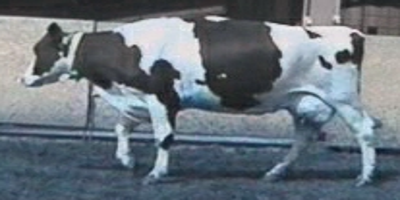

In [ ]:
I = ImageLoad('cows/V',4,echo='on')
cv2_imshow(I)

## Extracción de descriptores SIFT

Se extrae el descriptor SIFT de 128 elementos de todos los keypoints de cada una de las imagenes. Son alrededor de 400-500 keypoints por imagen. Todos los keypoints, que en este ejemplo son 35910, se almacenan en una matriz `X` de 35910 x 128 elementos. Adicionalmente, cada descriptor se almacena de forma normalizada (con norma = 1). Al mismo tiempo se almacena en el vector `y` de 35910 elementos, el número de la imagen de donde viene el keypoint, es decir este vector tiene un número entre 0 y 79.

In [ ]:
t = 0
Xt = np.zeros((50000,128))
yt = np.zeros((50000,))

N = 80

for i in range(N):
  I = ImageLoad('cows/V',i+1,echo='on')
  J = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
  # Extracción de SIFT
  kp, desc = feature_extractor.detectAndCompute(J, None)
  ni = desc.shape[0]
  for j in range(ni):
    f = desc[j,:]
    Xt[t,:] =  f/np.linalg.norm(f)
    yt[t] = i
    t = t+1;

  print('... '+str(ni)+' descriptores extraidos.')

X = Xt[0:t,:]
y = yt[0:t]
print('Total de descriptores SIFT en '+str(N)+' imagenes: '+str(t))

loading image cows/V00001.png...
... 424 descriptores extraidos.
loading image cows/V00002.png...
... 404 descriptores extraidos.
loading image cows/V00003.png...
... 338 descriptores extraidos.
loading image cows/V00004.png...
... 492 descriptores extraidos.
loading image cows/V00005.png...
... 406 descriptores extraidos.
loading image cows/V00006.png...
... 469 descriptores extraidos.
loading image cows/V00007.png...
... 460 descriptores extraidos.
loading image cows/V00008.png...
... 442 descriptores extraidos.
loading image cows/V00009.png...
... 459 descriptores extraidos.
loading image cows/V00010.png...
... 418 descriptores extraidos.
loading image cows/V00011.png...
... 544 descriptores extraidos.
loading image cows/V00012.png...
... 490 descriptores extraidos.
loading image cows/V00013.png...
... 357 descriptores extraidos.
loading image cows/V00014.png...
... 419 descriptores extraidos.
loading image cows/V00015.png...
... 439 descriptores extraidos.
loading image cows/V00016

## Testing

Se busca la imagen más parecida a la imagen `itest`, es decir aquella imagen (que no es la imagen de testing) que contenga la mayor cantidad de descriptores SIFT parecidos a los descripores SIFT del testing.

In [ ]:
for itest in [4,14,24,34,44,54,64,74]:

  ik = itest - 1  # se resta 1 porque la imagen 1 ha sido indexada como 0
  ii = np.where(y==ik)[0] # indice de los descriptores que son de la imagen itest     (testing)
  jj = np.where(y!=ik)[0] # indice de los descriptores que no son de la imagen itest  (training)

  Xi = X[ii,:] # descriptores que son de la imagen itest
  Xj = X[jj,:] # descriptores que no son de la imagen itest
  yj = y[jj]   # número de imagen a la que pertenecen los descriptores que no son del test

  Dt = np.dot(Xj,Xi.T) # producto punto entre todos los descriptores de Xi con todos de Xj

  n = Xi.shape[0]      # numero de descriptores de la imagen de test


  # Para cada descriptor de la imagen de testing se busca 1) el descriptor en el training más parecido, 
  # y 2) el valor del producto punto con este vector

  z = np.zeros((n,))
  d = np.zeros((n,))

  for k in range(n):
      h    = Dt[:,k];        # h es el producto punto del descriptor del keypoint k del testing con todos los descriptores del training
      i    = h.max()         # i es el producto punto máximo (es decir con el descriptor del training más parecido al descriptor k del testing)
      z[k] = i
      j    = np.where(h==i)  # j es el índice del mejor producto punto
      d[k] = yj[j]           # este es el número de la imágen a la cual pertenece el descriptor de training más parecido

  # Se busca aquellos descriptores del training que son muy parecidos a los descriptores del testing
  kk = np.where(z>0.9)
  
  # Se calcula la image de training más frecuente, es decir aquella imágen que contiene el mayor número de descriptores parecidos
  m = stats.mode(d[kk])
  ifound = np.int(m[0])+1    # se suma 1 porque la clase 0 pertenece a la imagen 1

  I = ImageLoad('cows/V',itest,echo='on')

  print('Imagen de Testing: '+str(itest))
  cv2_imshow(I)
  print(' ')
  J = ImageLoad('cows/V',ifound,echo='on')
  print('Para la imagen '+str(itest)+', la imagen más parecidad es la imagen '+str(ifound)+'.')
  cv2_imshow(J)
  print('--------------------------------------------------')
